In [8]:
##############  Question 1 ####################

import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.gofplots import qqplot
from IPython.display import display
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import norm
import math
import random
import numpy as np
import pandas as pd
import scipy.stats as stat
import warnings
from datetime import datetime, date
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
import pylab


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
def won_medal(row):
    if row['gold'] == 1:
        return 1
    if row['silver'] == 1:
        return 1
    if row['bronze'] == 1:
        return 1
    return 0

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

athlete_data = pd.read_csv("./athletes.csv")
countries = pd.read_csv("./countries.csv")
#renaming the "code" column in "countries" table in order to join the tables later
countries.rename(columns={'code':'nationality'}, inplace=True)
#joining the table on "nationality" column
athlete_data = pd.merge(athlete_data, countries,on='nationality')
#changing "sex" column to binary data
athlete_data['sex'] = athlete_data.sex.map(dict(female=1, male=0))
#creating a column indicating wether the athlete won any medal
athlete_data['won_any_medal'] = athlete_data.apply(lambda row: won_medal(row), axis=1)
#converting the "dob" column to datetime
athlete_data['dob'] = pd.to_datetime(athlete_data.dob)
athlete_data['dob'] = athlete_data['dob'].mask(athlete_data['dob'].dt.year > 2016,
                                               athlete_data['dob'] - pd.DateOffset(years=100))
athlete_data_all = athlete_data
athlete_data_all = athlete_data_all.dropna()
np.random.seed(20)
athlete_data_sample_200 = athlete_data_all.sample(n=200).reset_index()
display(athlete_data_sample_200)
athlete_data_sample_1000 = pd.concat([athlete_data_all, athlete_data_sample_200]).drop_duplicates(keep=False)
athlete_data_sample_1000 = athlete_data_all.sample(n=1000).reset_index()
athlete_data_sample_1000['age'] = (datetime.now() - athlete_data_sample_1000['dob']).astype('<m8[Y]')


#drop na in athelete data
athlete_data = athlete_data.dropna()
#drop na in sample data
sample_data = athlete_data.dropna()
sum_woman = 0
sum_man = 0
count_woman = 0
count_man = 0
sex_height_df = athlete_data[['sex','id', 'height']].replace({'male': 0, 'female': 1})
woman = sex_height_df.loc[sex_height_df["sex"] == 1, :]
woman = woman.dropna()
womans_height_array = woman['height'].to_numpy()
man = sex_height_df.loc[sex_height_df["sex"] == 0, :]
man = man.dropna()
mans_height_array = man['height'].to_numpy()


#Q2_1
#calculate median of height in sex_height_df

# Calculate median height of all athletes in sample dataframe
median_height = athlete_data_sample_200['height'].median()
tao = median_height
# Calculate probability of a randomly selected male athlete from sample dataframe being taller than median height
p_male_taller_than_median = athlete_data_sample_200[(athlete_data_sample_200['sex'] == 1) & (athlete_data_sample_200['height'] > median_height)].shape[0] / 200

# Calculate probability of a randomly selected athlete from sample dataframe being male
p_male = athlete_data_sample_200[athlete_data_sample_200['sex'] == 1].shape[0] / 200
B = 400
log_rat_list = []
for i in range(B):
    bootstrap_sample = athlete_data_sample_200.sample(n=200, replace = True)
    p_z1_given_y1 = len(bootstrap_sample[(bootstrap_sample.sex == 1) & (bootstrap_sample.height > tao)])/200
    p_y1 = len(bootstrap_sample[(bootstrap_sample.sex==1)])/200
    p_z1_y1 = p_z1_given_y1 / p_y1

    p_z1_given_y2 = len(bootstrap_sample[(bootstrap_sample.sex==0) & (bootstrap_sample.height>tao)])/200
    p_y2 = len(bootstrap_sample[(bootstrap_sample.sex==0)])/200
    p_z1_y2 = p_z1_given_y2/p_y2
    eta_1 = np.log(p_z1_y1/(1-p_z1_y1))
    eta_2 = np.log(p_z1_y2/(1-p_z1_y2))
    log_rat_list.append(eta_1-eta_2)

mean_log_rat = np.mean(log_rat_list)
std_log_rat = np.std(log_rat_list)
conf_int = [mean_log_rat - 1.96*std_log_rat, mean_log_rat + 1.96*std_log_rat]
print("The estimator of the log odds ratio is: ", mean_log_rat)
print("The 95% confidence interval for the log odds ratio is: ", conf_int)



,index,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,country,population,gdp_per_capita,won_any_medal
0,6136,881992373,Julia Gomes,ARG,1,1992-04-30,1.65,60.0,hockey,0,0,0,Argentina,43416755.0,13431.878340,0
1,1728,782975512,Heather O Reilly,USA,1,1985-01-02,1.66,59.0,football,0,0,0,United States,321418820.0,56115.718426,0
2,10384,449397409,Bozo Starcevic,CRO,0,1988-12-11,1.72,78.0,wrestling,0,0,0,Croatia,4224404.0,11535.829356,0
3,10512,487798358,Edgar Pineda Zeta,GUA,0,1997-08-17,1.62,56.0,weightlifting,0,0,0,Guatemala,16342897.0,3903.478856,0
4,917,50104802,Elizabeth Cui,NZL,1,1997-08-12,1.59,58.0,aquatics,0,0,0,New Zealand,4595700.0,37807.967276,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3396,575167357,Yuri van Gelder,NED,0,1983-04-20,1.61,63.0,gymnastics,0,0,0,Netherlands,16936520.0,44299.768085,0
196,2687,228902925,Mpumi Nyandeni,RSA,1,1987-08-19,1.62,50.0,football,0,0,0,South Africa,54956920.0,5723.973357,0
197,143,760029563,Javier Hernanz Agueria,ESP,0,1983-02-01,1.86,83.0,canoe,0,0,0,Spain,46418269.0,25831.582305,0
198,3755,246757906,Veronica Bertolini,ITA,1,1995-10-19,1.67,48.0,gymnastics,0,0,0,Italy,60802085.0,29957.804315,0


The estimator of the log odds ratio is:  -2.3507748057974034
The 95% confidence interval for the log odds ratio is:  [-3.025272872412466, -1.6762767391823408]


**#Q2_2**

In [9]:



# Count the number of athletes with sex=1 and height > tao
S1 = len(athlete_data_sample_200[(athlete_data_sample_200.sex == 1) & (athlete_data_sample_200.height > tao)])

# Count the number of athletes with sex=0 and height > tao
S2 = len(athlete_data_sample_200[(athlete_data_sample_200.sex == 0) & (athlete_data_sample_200.height > tao)])

# Count the number of athletes with sex=1
n1 = len(athlete_data_sample_200[athlete_data_sample_200.sex == 1])

# Count the number of athletes with sex=0
n2 = len(athlete_data_sample_200[athlete_data_sample_200.sex == 0])

log_rat_list = []
for i in range(B):
    p1 = np.random.beta(S1+1, n1-S1+1)
    p2 = np.random.beta(S2+1, n2-S2+1)
    log_rat_list.append(np.log(p1/(1-p1)) - np.log(p2/(1-p2)))

log_rat_list = np.array(sorted(log_rat_list))
low = np.quantile(log_rat_list, 0.025)
high = np.quantile(log_rat_list, 0.975)
credible_interval = [low, high]

print("estimator for log ratio is: ", log_rat_list.mean())
print("credible interval for log ratio based on uniform prior is: " + str(credible_interval))


estimator for log ratio is:  -2.323886426447014
credible interval for log ratio based on uniform prior is: [-3.030623302491462, -1.7358804640238092]


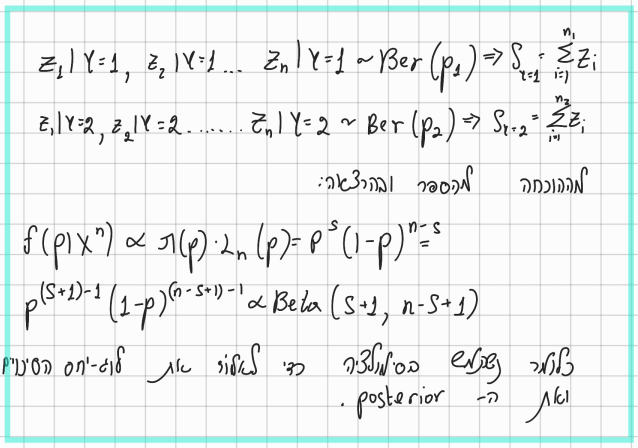

**#Q2_3**

In [10]:
#Q2_3
#use jeffreys prior to compute the estimator for log ratio
log_rat_list = []
for i in range(B):
    p1 = np.random.beta(S1+0.5, n1-S1+0.5)
    p2 = np.random.beta(S2+0.5, n2-S2+0.5)
    #log_rat_list = []
    #p1 = 0.5 #example value, replace with actual value
    #p2 = 0.7 #example value, replace with actual value

    # Check if p1 and p2 are valid probabilities (between 0 and 1)

    log_rat_list.append(np.log(p1/(1-p1)) - np.log(p2/(1-p2)))

log_rat_list = np.array(sorted(log_rat_list))
low = np.quantile(log_rat_list, 0.025)
high = np.quantile(log_rat_list, 0.975)
credible_interval = [low, high]
print("estimator for log ratio is: ", log_rat_list.mean())
print("credible interval for log ratio based on jeffreys prior is: " + str(credible_interval))


estimator for log ratio is:  -2.3515685872984813
credible interval for log ratio based on jeffreys prior is: [-3.0432737316149567, -1.7241270459246085]


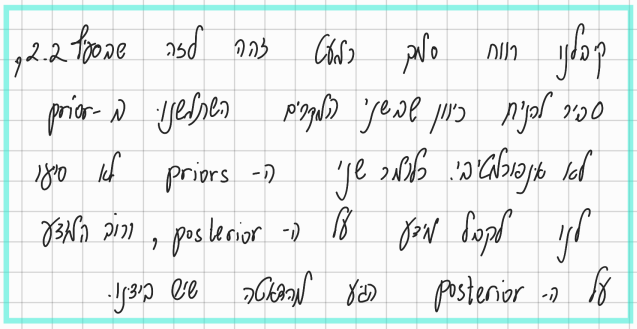

**Q2_4**

In [11]:

#Q2_4
median_height = athlete_data_sample_1000['height'].median()
s1_old =len(athlete_data_sample_1000[(athlete_data_sample_1000.sex==1) & (athlete_data_sample_1000.height > median_height)]) 
s2_old = len(athlete_data_sample_1000[(athlete_data_sample_1000.sex==0) & (athlete_data_sample_1000.height > median_height)]) 
n1_old = len(athlete_data_sample_1000[(athlete_data_sample_1000.sex==1)])
n2_old =  len(athlete_data_sample_1000[(athlete_data_sample_1000.sex==0)])

#################################################################
s1 =len(athlete_data_sample_200[(athlete_data_sample_200.sex==1) & (athlete_data_sample_200.height > 1.76)])
s2 = len(athlete_data_sample_200[(athlete_data_sample_200.sex==0) & (athlete_data_sample_200.height > 1.76)])
n1 = len(athlete_data_sample_200[(athlete_data_sample_200.sex==1)])
n2 =  len(athlete_data_sample_200[(athlete_data_sample_200.sex==0)])
p1_list =[]
p2_list = []
log_ratio_list = []
#CHANGEEEEE S1 S2 N1 N2 ACCORDING TO 1000
#use beta prior to compute the estimator for log ratio
log_rat_list = []
for i in range(B):
    p1 = np.random.beta(S1+2, n1-S1+2)
    p2 = np.random.beta(S2+2, n2-S2+2)
    log_rat_list.append(np.log(p1/(1-p1)) - np.log(p2/(1-p2)))

log_rat_list = np.array(sorted(log_rat_list))
low = np.quantile(log_rat_list, 0.025)
high = np.quantile(log_rat_list, 0.975)
credible_interval = [low, high]
print("estimator for log ratio is: ", log_rat_list.mean())
print("credible interval for log ratio based on beta prior is: " + str(credible_interval))

#compute mean of log_rat_list
#mean_log_rat = np.mean(log_rat_list)
#compute credible interval of log_rat_list
#credible_interval = np.percentile(log_rat_list, [2.5, 97.5])

estimator for log ratio is:  -2.2347304079388364
credible interval for log ratio based on beta prior is: [-2.921259891963953, -1.587112743213357]


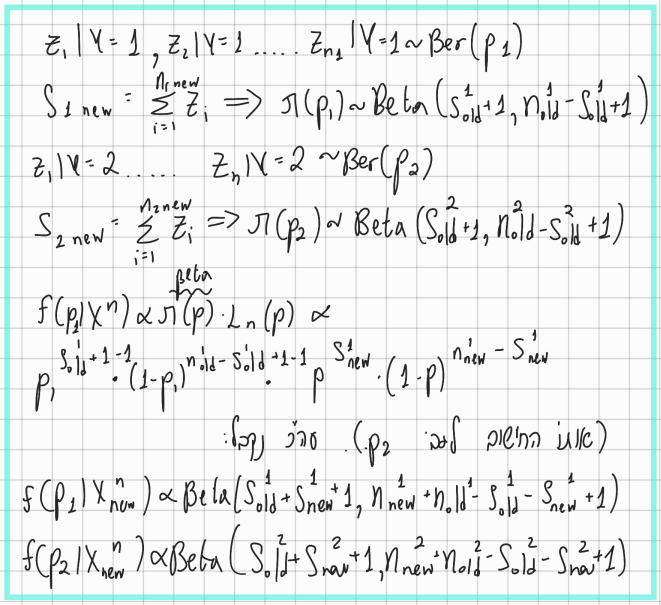

**Q2_5**

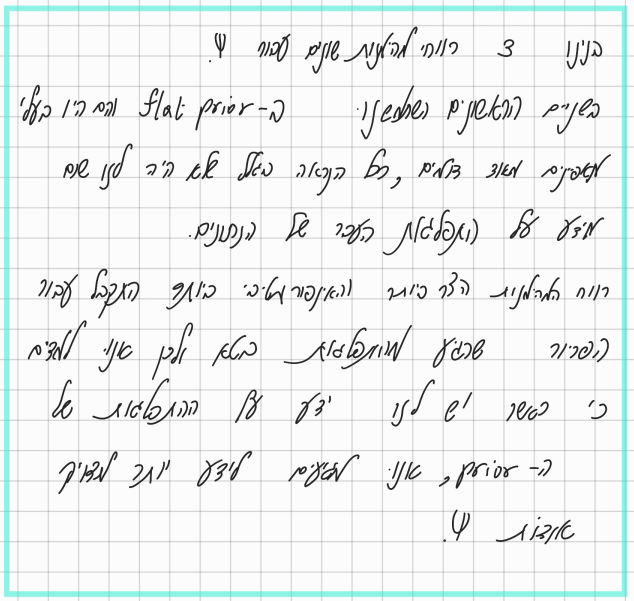

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime, date
import seaborn as sns
import scipy.stats as st
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels as statm
from scipy.stats import norm, f
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.linear_model import LogisticRegression
import math
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [13]:
def get_cleaned_data():
    import os
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            print(os.path.join(dirname, filename))

    data = pd.read_csv("./athletes.csv")
    data['dob'] = pd.to_datetime(data["dob"], format='%m/%d/%y')
    data['age'] = (pd.to_datetime('now') - data['dob']).astype('<m8[Y]')
    data['age'] = data['age'].astype(float)
    data["total"] = data[['gold', 'silver', 'bronze']].agg(sum, axis=1)
    data['gender']=data['sex'].copy()
    data['gender']= data['gender'].apply(lambda x: 1 if x=='Female' else 2)
    data['won'] = data['total'].apply(lambda x: x if x>0 else x+0.1)#1 if x == 0 else x)
    no_missing_values_data = data.dropna()
    no_missing_values_data = no_missing_values_data.loc[data['age'] > 0, :]
    return data,no_missing_values_data

In [14]:
def get_sample(data,sample_size):
    winners = data.loc[data['won']>0.5, :]
    sample = data.sample(n=sample_size, random_state=1)
    return sample

In [15]:
np.random.seed(42)

## **Question 1**

In [16]:
raw_df, clean_df = get_cleaned_data()
clean_df_sample = get_sample(clean_df,sample_size = 1000)
df_sample = get_sample(clean_df,sample_size = 1000)
#clean_data_sample = clean_df_sample[['weight', 'gender', 'won','age']].to_numpy()
#clean_data_sample = np.concatenate([np.ones((clean_data_sample.shape[0],1),dtype=clean_data_sample.dtype), clean_data_sample], axis=1)
ones = np.ones((df_sample.shape[0],1))
df_sample.insert(0,'bias',ones)
df_sample = df_sample.sort_values(by='age')
clean_X_sample = df_sample[['bias','weight', 'gender', 'won']]
clean_y_sample = df_sample[['age']] 
#clean_regressor_sample = LinearRegression().fit(clean_X_sample,clean_y_sample)
#clean_beta_sample = clean_regressor_sample.coef_

#raw_data_sample = raw_df_sample[['weight', 'gender', 'won','age']].to_numpy()
#raw_data_sample = np.concatenate([np.ones((raw_data_sample.shape[0],1),dtype=raw_data_sample.dtype), raw_data_sample], axis=1)
#raw_X_sample = raw_data_sample[:,:4]
#raw_y_sample = raw_data_sample[:,4] 

In [17]:
def SE_NormalCov(X,beta):
    X_array = X.to_numpy() 
    l = beta - 1.96 * np.sqrt(np.diag(np.linalg.pinv(X_array.T @ X_array)))
    u = beta + 1.96 * np.sqrt(np.diag(np.linalg.pinv(X_array.T @ X_array)))
    indices = list(range(3))
    l,u,beta = l.flatten().tolist(),u.flatten().tolist(),beta.flatten().tolist()
    for i in indices:
        print(f'\nBeta - {i}')
        print(f"CI Normal Aproximation by Covariance Matrix = [ {l[i]}, {u[i]}]")
        print(f'CI Length: {u[i] - l[i]}')
        print(f"CI contains the value of regression coeffision : {l[i] <= beta[i] <= u[i]}")

## **Question 2**


In [18]:
#clean_regressor_sample = LinearRegression().fit(clean_X_sample,clean_y_sample)
#clean_beta_sample = clean_regressor_sample.coef_
#SE_NormalCov(clean_X_sample,clean_beta_sample)
X_clean = clean_X_sample.copy()
y_clean = clean_y_sample.copy()
clean_beta_sample = np.linalg.pinv(X_clean.T.dot(X_clean)).dot(X_clean.T).dot(y_clean)
#drop_beta = cleaned_chopped_regressor.coef_
clean_Cov = np.linalg.pinv(X_clean.T.dot(X_clean))
clean_CI = np.zeros((4,2))
print(f'Clean Beta - \n{clean_beta_sample.flatten().tolist()}')
for i in range(4):
    se = np.sqrt(clean_Cov[i,i])
    clean_CI[i,0] = clean_beta_sample[i] - 1.96 * se
    clean_CI[i,1] = clean_beta_sample[i] + 1.96 * se
    print(f'\nClean Beta - {i} = {clean_beta_sample[i]}')
    print(f"Clean CI by Covariance Matrix = [{clean_CI[i,0]}, {clean_CI[i,1]}]")
    print(f'Clean CI Length: {clean_CI[i,1] - clean_CI[i,0]}')
    print(f"Clean CI contains the value of regression coeffision : {clean_CI[i,0] <= clean_beta_sample[i] <= clean_CI[i,1]} ")
#SE_NormalCov(df_drop,drop_beta)

Clean Beta - 
[6.126610340946961, 0.03046451068666305, 12.253220681893104, -0.019807530722604605]

Clean Beta - 0 = [6.12661034]
Clean CI by Covariance Matrix = [6.069668743962137, 6.183551937931784]
Clean CI Length: 0.11388319396964697
Clean CI contains the value of regression coeffision : [ True] 

Clean Beta - 1 = [0.03046451]
Clean CI by Covariance Matrix = [0.02663576929213647, 0.03429325208118963]
Clean CI Length: 0.007657482789053156
Clean CI contains the value of regression coeffision : [ True] 

Clean Beta - 2 = [12.25322068]
Clean CI by Covariance Matrix = [12.139337487923477, 12.367103875862732]
Clean CI Length: 0.22776638793925486
Clean CI contains the value of regression coeffision : [ True] 

Clean Beta - 3 = [-0.01980753]
Clean CI by Covariance Matrix = [-0.18409544916821033, 0.14448038772300112]
Clean CI Length: 0.32857583689121145
Clean CI contains the value of regression coeffision : [ True] 


In [19]:
# raw_regressor_sample = LinearRegression().fit(raw_X_sample,raw_y_sample)
# raw_beta_sample = raw_regressor_sample.coef_
# SE_NormalCov(clean_X_sample,raw_beta_sample)

## **Question 3**

In [20]:
def removeValues(sample,raw_data_sample, n):
    #display(raw_data_sample)
    #display(raw_data_sample)
    probability = raw_data_sample[:,4] / raw_data_sample[:,4].sum()
    cumulative_prob = probability.cumsum()
    mask = np.random.rand(len(raw_data_sample[:,4])) < cumulative_prob
    #missing_values_df = sample.mask(mask,np.nan)
    #display(mask)
    sample['missing_age'] = sample['age'].where(~mask,pd.NaT)
    #display(cumulative_prob)
    #np.random.choice(x, n_samples, p=x)
    #new_raw_data_sample = new_raw_data_sample[:n]
    #display(new_raw_data_sample)
    return sample

#### **Function is calculated by taking the cumulative sum of the probability of each element, and then using this as the threshold to decide which elements will be removed by using a random number generator. This will give higher values in the array a higher probability of being removed.**

# **Question 4**

## **4.A**

In [21]:
df_sample = df_sample[['bias','weight', 'gender', 'won','age']]
df_sample = df_sample.sort_values(by='age')
raw_data_sample = df_sample.to_numpy()
#raw_data_sample = np.concatenate([np.ones((df,raw_data_sample.shape[0],1),dtype=raw_data_sample.dtype), raw_data_sample], axis=1)
missing_df = removeValues(df_sample,raw_data_sample, n = 500).reset_index(drop=True)
#cleaned_chopped_data_sample = chopped_raw_data_sample[~np.isnan(chopped_raw_data_sample).any(axis=1)]
missing_values_indices = np.argwhere(missing_df['missing_age'].isna().to_numpy()).flatten()#.tolist()
df_drop = missing_df.dropna()
df_drop = df_drop.reset_index(drop=True)
X_drop = df_drop[['bias','weight', 'gender', 'won']].astype('float64')
y_drop = df_drop[['age']].astype('float64')
#raw_chopped_X = raw_chopped_data_sample[:,:4]
#raw_chopped_y = raw_chopped_data_sample[:,4]


In [22]:
#drop_regressor = LinearRegression().fit(X_drop.to_numpy(),y_drop.to_numpy())
drop_beta = np.linalg.pinv(X_drop.T.dot(X_drop)).dot(X_drop.T).dot(y_drop)
#drop_beta = cleaned_chopped_regressor.coef_
drop_Cov = np.linalg.pinv(X_drop.T.dot(X_drop))
drop_CI = np.zeros((4,2))
print(f'Drop Beta - \n{drop_beta.flatten().tolist()}')
for i in range(4):
    se = np.sqrt(drop_Cov[i,i])
    drop_CI[i,0] = drop_beta[i] - 1.96 * se
    drop_CI[i,1] = drop_beta[i] + 1.96 * se
    print(f'\nDrop Beta - {i} = {drop_beta[i]}')
    print(f"Drop CI by Covariance Matrix = [{drop_CI[i,0]}, {drop_CI[i,1]}]")
    print(f'Drop CI Length: {drop_CI[i,1] - drop_CI[i,0]}')
    print(f"Drop CI contains the value of regression coeffision : {drop_CI[i,0] <= drop_beta[i] <= drop_CI[i,1]} ")
#SE_NormalCov(df_drop,drop_beta)

Drop Beta - 
[5.3988023634795095, 0.03937028841083022, 10.7976047269596, 0.7026023988538721]

Drop Beta - 0 = [5.39880236]
Drop CI by Covariance Matrix = [5.321805112489354, 5.475799614469665]
Drop CI Length: 0.15399450198031062
Drop CI contains the value of regression coeffision : [ True] 

Drop Beta - 1 = [0.03937029]
Drop CI by Covariance Matrix = [0.03418429506047397, 0.04455628176118647]
Drop CI Length: 0.010371986700712502
Drop CI contains the value of regression coeffision : [ True] 

Drop Beta - 2 = [10.79760473]
Drop CI by Covariance Matrix = [10.643610224979293, 10.951599228939907]
Drop CI Length: 0.3079890039606141
Drop CI contains the value of regression coeffision : [ True] 

Drop Beta - 3 = [0.7026024]
Drop CI by Covariance Matrix = [0.48613509207448297, 0.9190697056332613]
Drop CI Length: 0.4329346135587783
Drop CI contains the value of regression coeffision : [ True] 


## **4.B**

### **Regression Imputation** <br>
In Regression Imputation, we replace the missing data with the values predicted in our regression model and repeat this process for each variable.

In [23]:
missing_df_imp = missing_df.copy()
X_drop_array = missing_df[['bias','weight', 'gender', 'won']].to_numpy()
#for i in range(missing_df_imp.shape[0]):
#X_drop_array[i].dot(drop_beta)
#missing_df_imp['imp_age'] = missing_df_imp['missing_age'].apply(lambda x:X_drop_array[i].dot(drop_beta))
for i in missing_values_indices:    
    #if missing_df_imp.loc[i,'missing_age'] == np.nan:
    missing_df_imp.loc[i,'missing_age'] = X_drop_array[i].dot(drop_beta).item()

X_imp = missing_df_imp[['bias','weight', 'gender', 'won']]
y_imp = missing_df_imp[['missing_age']]
imp_beta = np.linalg.pinv(X_imp.T.dot(X_imp)).dot(X_imp.T).dot(y_imp)
#drop_beta = cleaned_chopped_regressor.coef_
imp_Cov = np.linalg.pinv(X_imp.T.dot(X_imp))
imp_CI = np.zeros((4,2))
print(f'Regression Imputation Beta - {imp_beta.flatten().tolist()}')
for i in range(4):
    se = np.sqrt(imp_Cov[i,i])
    imp_CI[i,0] = imp_beta[i] - 1.96 * se
    imp_CI[i,1] = imp_beta[i] + 1.96 * se
    print(f'\nBeta - {i} = {imp_beta[i]}')
    print(f"CI by Covariance Matrix = [{imp_CI[i,0]}, {imp_CI[i,1]}]")
    print(f'CI Length: {imp_CI[i,1] - imp_CI[i,0]}')
    print(f"CI contains the value of regression coeffision : {imp_CI[i,0] <= imp_beta[i] <= imp_CI[i,1]} ")

# SE_NormalCov(df_drop,drop_beta)

Regression Imputation Beta - [5.398802363479716, 0.039370288410848796, 10.797604726958753, 0.7026023988540967]

Beta - 0 = [5.398802363479716]
CI by Covariance Matrix = [5.341860766494893, 5.45574396046454]
CI Length: 0.11388319396964697
CI contains the value of regression coeffision : [ True] 

Beta - 1 = [0.039370288410848796]
CI by Covariance Matrix = [0.03554154701632222, 0.04319902980537537]
CI Length: 0.007657482789053149
CI contains the value of regression coeffision : [ True] 

Beta - 2 = [10.797604726958753]
CI by Covariance Matrix = [10.683721532989125, 10.91148792092838]
CI Length: 0.22776638793925486
CI contains the value of regression coeffision : [ True] 

Beta - 3 = [0.7026023988540967]
CI by Covariance Matrix = [0.538314480408491, 0.8668903172997025]
CI Length: 0.3285758368912115
CI contains the value of regression coeffision : [ True] 


### Estimator for beta with 'regression imputation' method is similiar to the one we got with the 'drop missing values' method.

# **4.C**

### **Multiple Imputation** <br>
In Multiple Imputation, we replace the missing data with the values predicted in our regression model and repeat this process for each variable multiple times.

In [24]:
impM = 10
df_multiimp = [[i for i in missing_values_indices] for reply in range(impM)]
for reply in range(impM):    
    df_multiimp[reply] = missing_df.copy()
    X_drop_array = missing_df[['bias','weight', 'gender', 'won']].to_numpy()
    for i in missing_values_indices:    
    #if missing_df_imp.loc[i,'missing_age'] == np.nan:
        df_multiimp[reply].loc[i,'missing_age'] = X_drop_array[i].dot(drop_beta).item()

beta_impM = []
cov_impM = []
for i in range(impM):
    X_impM = df_multiimp[reply][['bias','weight', 'gender', 'won']]
    y_impM = df_multiimp[reply][['missing_age']]
    beta_impM_i = np.linalg.pinv(X_impM.T.dot(X_impM)).dot(X_impM.T).dot(y_impM)
    cov_impM_i = np.linalg.pinv(X_impM.T.dot(X_impM))
    beta_impM.append(beta_impM_i)
    cov_impM.append(cov_impM_i)
    
#drop_beta = cleaned_chopped_regressor.coef_
mean_beta_impM = np.mean(beta_impM,axis=0)
impM_CI = np.zeros((4,2))
print(f'Multiple Imputations Beta - {mean_beta_impM.flatten().tolist()}')
for i in range(4):
    se = np.sqrt(np.mean(cov_impM,axis=0)[i,i])
    impM_CI[i,0] = mean_beta_impM[i] - 1.96 * se
    impM_CI[i,1] = mean_beta_impM[i] + 1.96 * se
    print(f'\nBeta - {i} = {mean_beta_impM[i]}')
    print(f"CI by Covariance Matrix = [{impM_CI[i,0]}, {impM_CI[i,1]}]")
    print(f'CI Length: {impM_CI[i,1] - impM_CI[i,0]}')
    print(f"CI contains the value of regression coeffision : {impM_CI[i,0] <= mean_beta_impM[i] <= impM_CI[i,1]} ")



Multiple Imputations Beta - [5.398802363479716, 0.03937028841084879, 10.797604726958753, 0.7026023988540968]

Beta - 0 = [5.398802363479716]
CI by Covariance Matrix = [5.341860766494893, 5.45574396046454]
CI Length: 0.11388319396964697
CI contains the value of regression coeffision : [ True] 

Beta - 1 = [0.03937028841084879]
CI by Covariance Matrix = [0.035541547016322214, 0.043199029805375364]
CI Length: 0.007657482789053149
CI contains the value of regression coeffision : [ True] 

Beta - 2 = [10.797604726958753]
CI by Covariance Matrix = [10.683721532989125, 10.91148792092838]
CI Length: 0.22776638793925486
CI contains the value of regression coeffision : [ True] 

Beta - 3 = [0.7026023988540968]
CI by Covariance Matrix = [0.5383144804084911, 0.8668903172997026]
CI Length: 0.3285758368912115
CI contains the value of regression coeffision : [ True] 


### Estimator for beta with 'Multiple imputation' method is **very** similiar to the one we got with the 'single regression imputation' method.

# **4.D**

### Robin's estimator for multiple imputation

In [25]:
sum_b = 0
sum_cov = 0
robins_beta = [0 for i in range(4)]
for j in range(len(beta_impM[0])):
    sum_b = 0
    sum_cov = 0
    for k in range(impM):
        sum_b += (impM + 1) / (impM * (impM - 1)) * (beta_impM[k][j] - mean_beta_impM[j])
        sum_cov += (1 / impM) * cov_impM[k][j,j]
    robins_beta[j] = sum_b + sum_cov

for c,b_coeff in enumerate(robins_beta):
    #print(b_coeff)
    robins_beta[c] = np.sqrt(b_coeff.item())

print(f"\nRobin's Beta = {robins_beta}")
robins_CI = np.zeros((4,2))
for i in range(4):
    se = np.sqrt(np.mean(cov_impM,axis=0)[i,i])
    robins_CI[i,0] = robins_beta[i] - 1.96 * se
    robins_CI[i,1] = robins_beta[i] + 1.96 * se
    print(f'\nBeta - {i} = {robins_beta[i]}')
    print(f"CI by Robin's = [{robins_CI[i,0]}, {robins_CI[i,1]}]")
    print(f'CI Length: {robins_CI[i,1] - robins_CI[i,0]}')
    print(f"CI contains the value of regression coeffision : {robins_CI[i,0] <= robins_beta[i] <= robins_CI[i,1]} ")




Robin's Beta = [0.029051835196338426, 0.0019534394870055266, 0.058103670392667096, 0.08382036655387969]

Beta - 0 = 0.029051835196338426
CI by Robin's = [-0.02788976178848489, 0.08599343218116175]
CI Length: 0.11388319396964663
CI contains the value of regression coeffision : True 

Beta - 1 = 0.0019534394870055266
CI by Robin's = [-0.0018753019075210503, 0.005782180881532104]
CI Length: 0.007657482789053155
CI contains the value of regression coeffision : True 

Beta - 2 = 0.058103670392667096
CI by Robin's = [-0.0557795235769604, 0.1719868643622946]
CI Length: 0.227766387939255
CI contains the value of regression coeffision : True 

Beta - 3 = 0.08382036655387969
CI by Robin's = [-0.08046755189172607, 0.24810828499948545]
CI Length: 0.3285758368912115
CI contains the value of regression coeffision : True 


# **4.E**

### Coefficients for Logistic Regression

In [26]:
logR_df = missing_df.copy()
#X_drop_array = missing_df[['bias','weight', 'gender', 'won']].to_numpy()
indicators = np.zeros((1000,1))
for i in range(1000):
    if i in missing_values_indices:
        indicators[i] = 1
log_regression = LogisticRegression()
logR_df['indicators'] = indicators
logR_X = logR_df[['bias','weight', 'gender', 'won']]
logR_y = logR_df[['indicators']]
log_regression.fit(logR_X,logR_y)
logR_beta = log_regression.coef_.ravel().tolist() #%.2
print(f'Logistic Regression Beta Coefficients - {log_regression.coef_%.2}\n')
print(f"Logistic Regression Probabilites - \n{log_regression.predict_proba(logR_X.iloc[missing_values_indices,:])[:20,1]}")

Logistic Regression Beta Coefficients - [[0.11837133 0.0048808  0.03674267 0.05981852]]

Logistic Regression Probabilites - 
[0.44339067 0.45429363 0.44942151 0.48864548 0.47006414 0.48220087
 0.48098233 0.4409829  0.45183811 0.45910111 0.44700729 0.46763322
 0.48707703 0.47976401 0.47854593 0.45667803 0.46516705 0.45183811
 0.44942151 0.4555039 ]


## **4.F**

### Coefficients for IPW

In [27]:
IPW = 1 / log_regression.predict_proba(X_drop)[:,1]
X_drop_IPW = X_drop.T * IPW
X_drop_IPW = X_drop_IPW.T
y_drop_IPW = y_drop.T * IPW
y_drop_IPW = y_drop_IPW.T

beta_IPW = np.linalg.pinv(X_drop_IPW.T.dot(X_drop_IPW)).dot(X_drop_IPW.T).dot(y_drop_IPW)
print(f"IPW Beta Coefficients - {beta_IPW.flatten()%.2}\n")


IPW Beta Coefficients - [0.18455142 0.04041136 0.16910284 0.09045011]



## **4.G**

### Coefficients for Bootstrap IPW

In [28]:
B = 400
sum_b = 0
sum_cov = 0
beta_BootstrapIPW = [0 for b in range(B)]
for b in range(B):
    logR_Boot_df = logR_df.sample(n = logR_df['age'].shape[0],replace = True)
    logR_Boot_X = logR_Boot_df[['bias','weight', 'gender', 'won']]
    logR_Boot_y = logR_Boot_df[['indicators']]
    drop_Boot_df = logR_Boot_df.dropna()
    drop_Boot_X = drop_Boot_df[['bias','weight', 'gender', 'won']]
    drop_Boot_y = drop_Boot_df[['age']]
    log_regression_Boot = LogisticRegression()
    log_regression_Boot.fit(logR_Boot_X,logR_Boot_y)
    IPW = 1 / log_regression.predict_proba(drop_Boot_X)[:,1]
    X_drop_IPW_boot = drop_Boot_X.T * IPW
    X_drop_IPW_boot = X_drop_IPW_boot.T
    y_drop_IPW_boot = drop_Boot_y.T * IPW
    y_drop_IPW_boot = y_drop_IPW_boot.T

    beta_BootstrapIPW[b] = np.linalg.pinv(X_drop_IPW_boot.T.dot(X_drop_IPW_boot)).dot(X_drop_IPW_boot.T).dot(y_drop_IPW_boot)

mean_beta_BootstrapIPW = np.mean(beta_BootstrapIPW, axis = 0)
print(f"Mean Bootstrap IPW Beta Coefficients - {mean_beta_BootstrapIPW.flatten()%.2}\n")

beta_BootstrapIPW = np.array(beta_BootstrapIPW)
IPW_bootstrap_CI = np.zeros((4,2))
for i in range(4):
    se = np.sqrt(np.mean(cov_impM,axis=0)[i,i])
    IPW_bootstrap_CI[i,0] = mean_beta_BootstrapIPW[i] - 1.96 * se
    IPW_bootstrap_CI[i,1] = mean_beta_BootstrapIPW[i] + 1.96 * se
    print(f'\nBeta - {i} = {mean_beta_BootstrapIPW[i]}')
    print(f"CI by Covariance Matrix = [{IPW_bootstrap_CI[i,0]}, {IPW_bootstrap_CI[i,1]}]")
    print(f'CI Length: {IPW_bootstrap_CI[i,1] - IPW_bootstrap_CI[i,0]}')
    #print(f"CI contains the value of regression coeffision : {IPW_bootstrap_CI[i,0] <= mean_beta_impM[i] <= IPW_bootstrap_CI[i,1]} ")



Mean Bootstrap IPW Beta Coefficients - [0.19142307 0.03982053 0.18284613 0.105377  ]


Beta - 0 = [5.39142307]
CI by Covariance Matrix = [5.334481468874567, 5.448364662844214]
CI Length: 0.11388319396964697

Beta - 1 = [0.03982053]
CI by Covariance Matrix = [0.03599178501859383, 0.04364926780764698]
CI Length: 0.007657482789053149

Beta - 2 = [10.78284613]
CI by Covariance Matrix = [10.668962937749109, 10.896729325688364]
CI Length: 0.22776638793925486

Beta - 3 = [0.705377]
CI by Covariance Matrix = [0.5410890815735596, 0.8696649184647711]
CI Length: 0.3285758368912115


## **4.H**

### Beta Estimators

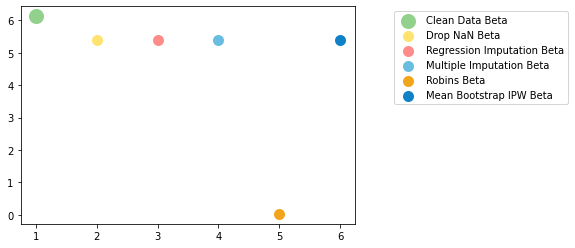

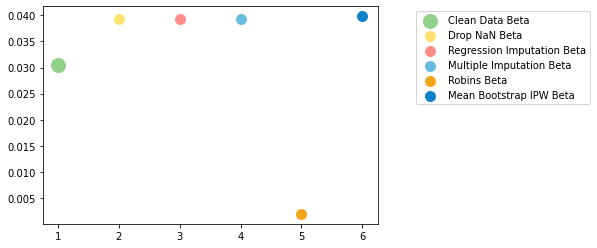

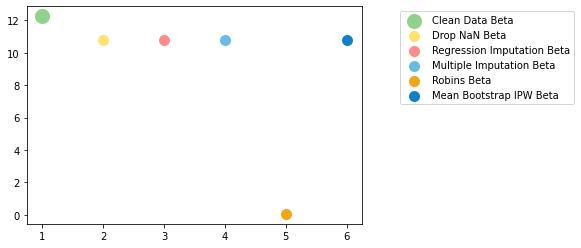

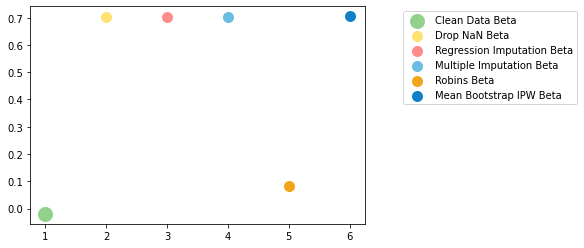

In [29]:
betas = [clean_beta_sample,drop_beta,imp_beta,mean_beta_impM,robins_beta,logR_beta,beta_IPW,mean_beta_BootstrapIPW]
for i in range(4): 
    plt.scatter([1],clean_beta_sample[i],label = 'Clean Data Beta',c = '#91D18B',linewidths=9)
    plt.scatter([2],drop_beta[i],label = 'Drop NaN Beta',c = '#FFE26F',linewidths=5)
    plt.scatter([3],imp_beta[i],label = 'Regression Imputation Beta',c = '#FF8B8B',linewidths=5)
    plt.scatter([4],mean_beta_impM[i],label = 'Multiple Imputation Beta',c = '#68BDE1',linewidths=5)
    plt.scatter([5],robins_beta[i],label = 'Robins Beta',c = '#F2A51A',linewidths=5)
    plt.scatter([6],mean_beta_BootstrapIPW[i],label = 'Mean Bootstrap IPW Beta',c = '#0F81C7',linewidths=5)
    plt.legend(loc='upper left',bbox_to_anchor= (1.1,1))
    plt.show()

### Confident Intervals

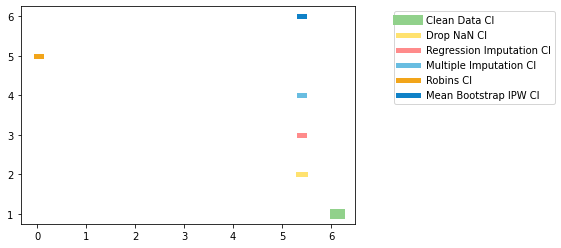

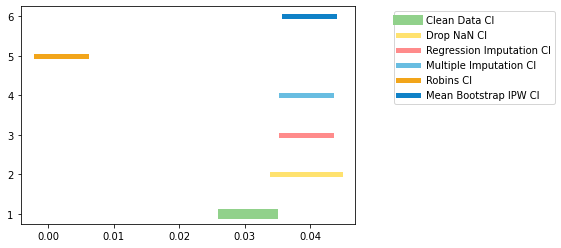

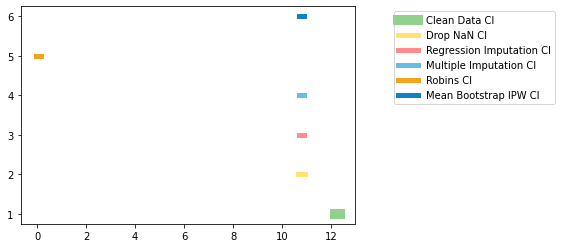

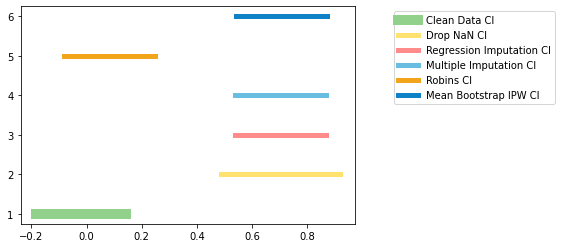

In [30]:
for i in range(4): 
    plt.plot(clean_CI[i],[1,1],label = 'Clean Data CI',c = '#91D18B',lw=10)
    plt.plot(drop_CI[i],[2,2],label = 'Drop NaN CI',c= '#FFE26F',lw=5)
    plt.plot(imp_CI[i],[3,3],label = 'Regression Imputation CI',c = '#FF8B8B',lw=5)
    plt.plot(impM_CI[i],[4,4],label = 'Multiple Imputation CI',c = '#68BDE1',lw=5)
    plt.plot(robins_CI[i],[5,5],label = 'Robins CI',c = '#F2A51A',lw=5)
    plt.plot(IPW_bootstrap_CI[i],[6,6],label = 'Mean Bootstrap IPW CI',c = '#0F81C7',lw=5)
    plt.legend(loc='upper left',bbox_to_anchor= (1.1,1))
    plt.show()

#### As we can observe, using Mean Bootstrap IPW and Robins are the closest to sampled clean whole data Beta estimator and CI.